In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("data/05-insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Calculate descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
df_for_clustering = df[["age", "bmi", "children", "charges"]]
df_for_clustering.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


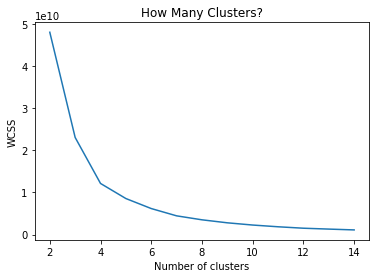

In [5]:
wcss = []

for i in range(2,15): 
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, 
                    n_init=10, random_state=0)
    kmeans.fit(df_for_clustering)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('How Many Clusters?')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Clustering (k = 8)

kmeans = KMeans(n_clusters = 8) 
kmeans.fit(df_for_clustering)
y_kmeans = kmeans.predict(df_for_clustering) # Cluster labels for each records

In [7]:
print(kmeans.cluster_centers_)

[[5.39604317e+01 3.10680036e+01 1.03597122e+00 1.22663317e+04]
 [3.13181818e+01 3.35461932e+01 1.05681818e+00 3.71431339e+04]
 [2.51294416e+01 2.98559010e+01 7.63959391e-01 3.18618895e+03]
 [4.96133333e+01 2.87108000e+01 1.24000000e+00 2.62922489e+04]
 [3.44369748e+01 2.75495798e+01 1.19327731e+00 1.92142700e+04]
 [5.09516129e+01 3.70004839e+01 1.27419355e+00 4.55019848e+04]
 [4.29274448e+01 3.08006625e+01 1.46687697e+00 7.70409944e+03]
 [4.30000000e+01 3.71760000e+01 8.00000000e-01 6.00182353e+04]]


## Data Plotting with PCA

In [8]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components = 2)
df_pca = sklearn_pca.fit_transform(df_for_clustering)

sklearn_pca.explained_variance_ratio_

array([9.99998521e-01, 1.22657512e-06])

In [9]:
# Initialize the class object
kmeans = KMeans(n_clusters = 8)
 
# Predict the labels of clusters.
label = kmeans.fit_predict(df_pca)

### Plotting clusters

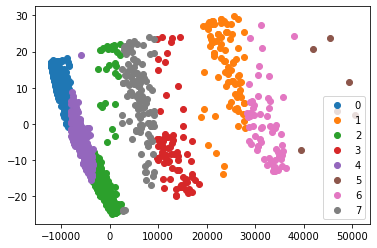

In [10]:
# Getting unique labels
u_labels = np.unique(label)
 
# Plotting the results:
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

### Plotting clusters with centroids

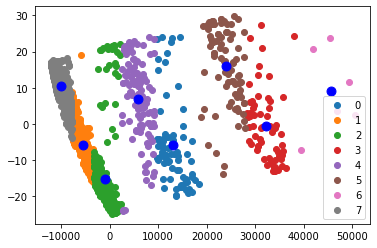

In [25]:
# Getting the Centroids
centroids = kmeans.cluster_centers_
 
# Plotting the results
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='b')
plt.legend()
plt.show()